In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Read the effective area data

In [40]:
# Source: https://dataverse.harvard.edu/file.xhtml?fileId=6982705&version=2.0
# Units:
#  [energy] = GeV
#  [Aeff_dec_*] = m^2
energy, Aeff_dec_30_90, Aeff_dec_0_30, Aeff_dec_m5_0, Aeff_dec_m30_m5, Aeff_dec_m90_m30 \
    = np.loadtxt("Effa_gfugold.txt", unpack=True)

## Plot the effective area

Text(0, 0.5, 'Effective area, $A_{\\rm eff}$ [m$^2$]')

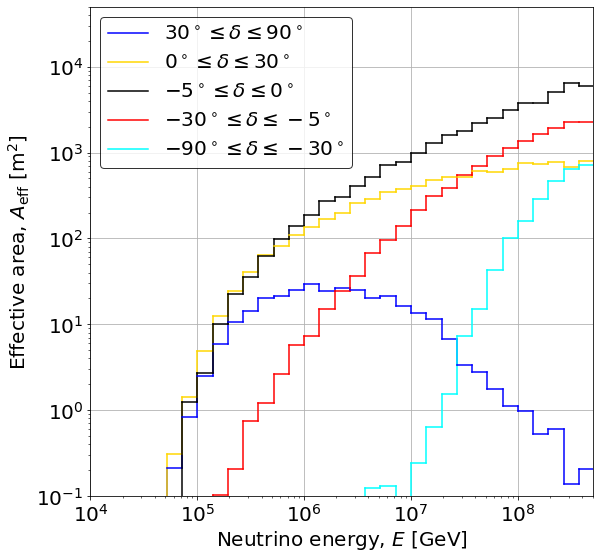

In [73]:
mpl.rcParams['xtick.labelsize']=20
mpl.rcParams['ytick.labelsize']=20
mpl.rcParams['legend.fontsize']=20

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1)

# Matplotlib does not handle plotting histograms with log scales well, so we need to hack it
energy_bins = list(zip(energy[::1], energy[1::1]))
for i, e in enumerate(energy_bins):
    # Dec: 30° to 90°
    ax.plot(e, [Aeff_dec_30_90[i], Aeff_dec_30_90[i]], color='blue',
           label=r'$30^\circ \leq \delta \leq 90^\circ$' if i==0 else '')
    ax.plot([e[1], e[1]], [Aeff_dec_30_90[i], Aeff_dec_30_90[i+1]], color='blue')
    # Dec: 0° to 30°
    ax.plot(e, [Aeff_dec_0_30[i], Aeff_dec_0_30[i]], color='gold',
           label=r'$0^\circ \leq \delta \leq 30^\circ$' if i==0 else '')
    ax.plot([e[1], e[1]], [Aeff_dec_0_30[i], Aeff_dec_0_30[i+1]], color='gold')
    # Dec: -5° to 0°
    ax.plot(e, [Aeff_dec_m5_0[i], Aeff_dec_m5_0[i]], color='black',
           label=r'$-5^\circ \leq \delta \leq 0^\circ$' if i==0 else '')
    ax.plot([e[1], e[1]], [Aeff_dec_m5_0[i], Aeff_dec_m5_0[i+1]], color='black')
    # Dec: -30° to -5°
    ax.plot(e, [Aeff_dec_m30_m5[i], Aeff_dec_m30_m5[i]], color='red',
            label=r'$-30^\circ \leq \delta \leq -5^\circ$' if i==0 else '')
    ax.plot([e[1], e[1]], [Aeff_dec_m30_m5[i], Aeff_dec_m30_m5[i+1]], color='red')
    # Dec: -90° to -30°
    ax.plot(e, [Aeff_dec_m90_m30[i], Aeff_dec_m90_m30[i]], color='cyan',
            label=r'$-90^\circ \leq \delta \leq -30^\circ$' if i==0 else '')
    ax.plot([e[1], e[1]], [Aeff_dec_m90_m30[i], Aeff_dec_m90_m30[i+1]], color='cyan')

plt.legend(frameon=True, loc='upper left', edgecolor='k')
ax.grid()
plt.xlim(1.e4, 5.e8)
plt.ylim(1.e-1, 5.e4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Neutrino energy, $E$ [GeV]', fontsize=20)
ax.set_ylabel(r'Effective area, $A_{\rm eff}$ [m$^2$]', fontsize=20)